# CSCI E7 Introduction to Programming with Python
## Lecture 10 Jupyter Notebook
Fall 2021 (c) Jeff Parker

# Beautiful Soup
## An introduction to Webscraping
### By Lena Hajjar, with additions by Jeff Parker

<p> Many of you have expressed interest in processing information found on websites</p>
<p> There are many options, but the library that is mentioned most often is Beautiful Soup</p>

#### Some Basics
Beautiful Soup has an excellent website, with full documentation.  See https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 

<b> NOTE: </b> Webscraping may be against the terms and conditions of some websites (Yelp, FB, etc). Sometimes it's because they offer the services for a fee (Twitter, Facebook, etc) - so if you really want the information and really don't want to break the terms & conditions (or get your IP address banned from the website), you can try getting the information through the recommended sources. The rules are really made to prevent people from doing mass scrapings for profit - I doubt they would bother tracking down the graduate student scraping one or two pages for educational purposes. 

<b> robots.txt </b> The convention is that the publisher will list the rules in a file called robots.txt at the root of the website.  

In [2]:
from bs4 import BeautifulSoup
import requests

# first, we want to read the rules of the road
webpage = requests.get("https://www.movieforums.com/robots.txt")
webtext = webpage.text
print(webtext)

User-agent: *
Disallow: /scripts/
Disallow: /cgi-bin/
Disallow: /community/admin/
Disallow: /community/images/
Disallow: /community/mod/
Disallow: /community/avatar.php
Disallow: /community/editpost.php
Disallow: /community/member2.php
Disallow: /community/moderator.php
Disallow: /community/newreply.php
Disallow: /community/newthread.php
Disallow: /community/online.php
Disallow: /community/postings.php
Disallow: /community/private.php
Disallow: /community/register.php
Disallow: /community/report.php
Disallow: /community/threadrate.php
Disallow: /community/usercp.php


## Is our use legitimate?
What does that mean for us?  Is this use legitimate?  We can use the robotparser library to check.  

We demonstrate below, checking if we can scrape the Extension School site.

In [7]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url("https://www.extension.harvard.edu/robots.txt")
rp.read()
print(rp.can_fetch("*", "https://www.movieforums.com/"))

True


In [6]:
# help(urllib.robotparser)

#### Let's start at the beginning:
Let's say we want to look at a thread in movieforums.com about the movie Die Hard.  Here is a thread we will process: https://www.movieforums.com/community/showthread.php?t=49209

In [9]:
from bs4 import BeautifulSoup
import requests

# first, we should request the webpage
webpage = requests.get("https://www.movieforums.com/community/showthread.php?t=49209")
webtext = webpage.text
# We can print it, but it isn't very useful
# print(webtext)

In [10]:
print(type(webtext))

<class 'str'>


In [11]:
#Now we have the ingredients - let's make the soup!
soup = BeautifulSoup(webtext, "html.parser") 
# I just passed the string with all of the html data, and asked to use the html parser

In [13]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [15]:
#you can ask beautiful soup to print everything it parsed

# print(soup.prettify())

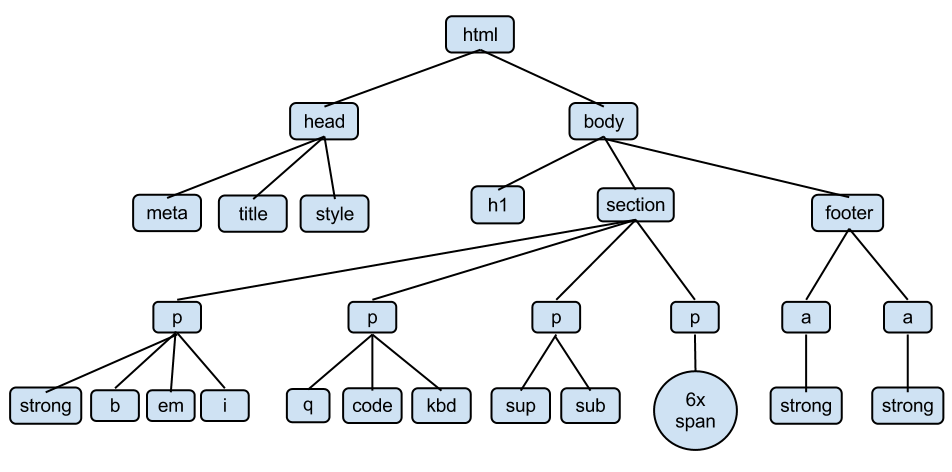

In [1]:
# What is the organization of a webpage?
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

In [23]:
# Cool! we have our soup- now let's see what's in it. 
# You can look for a tag itself (like the title tag)
print(soup.title) #notice that the tags are still here
print("===========================")
print(soup.title.string) #cool, now we know how to get the text inbetween the tags!
print("===========================")
print(soup.div)
print("===========================")
print(soup.div['class']) #you can ask for an attribute 
print("===========================")
print(soup.a)
print("===========================")
print(soup.a['href']) #cool, a new link! 

# note that this only returns the first instance of each tag specified! 

<title> Is Die Hard (1988) overrated? - Movie Forums</title>
 Is Die Hard (1988) overrated? - Movie Forums
<div class="hidden">
<img class="hidden" src="/images/logo_hover.png"/>
<img class="hidden" src="/images/blackpixel_80.png"/>
</div>
['hidden']
<a href="https://www.movieforums.com" style="font-size: 4.5em;" title="Movie Forums">Movie Forums</a>
https://www.movieforums.com


In [26]:
# what if we wanted ALL links?
links = soup.find_all('a')
# print(links) # this looks kind of ugly. What's happening here?
# print("===========================")
print(type(links)) #it's a set!
# print("===========================")

# say I wanted to find out all the links and text displayed
for i in links:
     print(i['href'], ":", i.string)

<class 'bs4.element.ResultSet'>
https://www.movieforums.com : Movie Forums
https://www.movieforums.com :  
/movies : Movies
/podcasts : Podcasts
/reviews : Reviews
/community : Forums
/lists : Lists
/boxoffice : Box Office
/community/quiz.php : Quizzes
# : None
/community/search.php?s=c870e7f74c751d6f4d2b749055f12f70&do=getdaily : Today's Posts
/community/shoutbox.php?s=c870e7f74c751d6f4d2b749055f12f70& : The Shoutbox
/community/register.php??s=c870e7f74c751d6f4d2b749055f12f70 : Register
/community/login_plain.php?s=c870e7f74c751d6f4d2b749055f12f70& : Log In
/community/register.php?c870e7f74c751d6f4d2b749055f12f70 : Register Today!


KeyError: 'href'

In [27]:
# we got a key error! I should probably deal with that error

for i in links:
    try:
        print(i['href'], ":", i.string)
    except KeyError:
        pass # I don't care mwhat happens to links without 'href's, so I skip them        

https://www.movieforums.com : Movie Forums
https://www.movieforums.com :  
/movies : Movies
/podcasts : Podcasts
/reviews : Reviews
/community : Forums
/lists : Lists
/boxoffice : Box Office
/community/quiz.php : Quizzes
# : None
/community/search.php?s=c870e7f74c751d6f4d2b749055f12f70&do=getdaily : Today's Posts
/community/shoutbox.php?s=c870e7f74c751d6f4d2b749055f12f70& : The Shoutbox
/community/register.php??s=c870e7f74c751d6f4d2b749055f12f70 : Register
/community/login_plain.php?s=c870e7f74c751d6f4d2b749055f12f70& : Log In
/community/register.php?c870e7f74c751d6f4d2b749055f12f70 : Register Today!
general-movie-discussion.html : General Movie Discussion
#goto_threadtools : Tools
showthread.php?s=c870e7f74c751d6f4d2b749055f12f70&t=49209&page=2 : 2
showthread.php?s=c870e7f74c751d6f4d2b749055f12f70&t=49209&page=2 : »
showthread.php?s=c870e7f74c751d6f4d2b749055f12f70&t=49209&page=6 : None
newreply.php?s=c870e7f74c751d6f4d2b749055f12f70&do=newreply&noquote=1&p=1695060 : None
member.php?s

 : None
member.php?s=c870e7f74c751d6f4d2b749055f12f70&u=95651 : None
search.php?s=c870e7f74c751d6f4d2b749055f12f70&do=finduser&u=95651 : None
private.php?s=c870e7f74c751d6f4d2b749055f12f70&do=newpm&u=95651 : None
showthread.php?p=1695145#post1695145 : 04-29-17
showthread.php?s=c870e7f74c751d6f4d2b749055f12f70&p=1695137#post1695137 : None
# : X
favoritesearch.php?movieid=60270 : Wish You Were Here
favoritesearch.php?movieid=48340 : Sanctum
favoritesearch.php?movieid=66113 : In Her Skin
favoritesearch.php?movieid=66125 : Red Dog
favoritesearch.php?movieid=287903 : Krampus
favoritesearch.php?movieid=333386 : The Duel
favoritesearch.php?movieid=331583 : The Whole Truth
favoritesearch.php?movieid=9774 : Kokoda
favoritesearch.php?movieid=390043 : The Hitman's Bodyguard
member.php?s=c870e7f74c751d6f4d2b749055f12f70&u=96919 : None
# : None
# : None
 : None
member.php?s=c870e7f74c751d6f4d2b749055f12f70&u=96919 : None
search.php?s=c870e7f74c751d6f4d2b749055f12f70&do=finduser&u=96919 : None
priva

In [29]:
# you could also get all the text on the page (problem solved, right?)
#  soup.get_text()

Problems with this "solution":
<ul>
<li> It's ugly </li>
<li> Everything is smushed together - you don't know who said what or when. </li>
<li> You literally have all the text including..
<ul>
<li>quotes (that'd be repeated text)</li> 
<li>signatures (meaningless to the question) </li>
<li>and all the text that is a part of the webpage! </li>
</ul>
</ul>

<p> So it looks like what we really want to do is find each post, and then get the information we want from it</p> 

In [30]:
## after doing some detective work, we discovered that posts are found in div tags with class 'post'.

allDiv = soup.find_all('div') # all div's
postDivs = [] # empty list
postDateDivs = []
postTextDivs = []

for div in allDiv:
    try:
        if 'post' in div.get('class'): # if it's a post, add to post list
            postDivs.append(div)
        elif 'postdate' in div.get('class'): # if it's a date, add to date list
            postDateDivs.append(div)
        elif 'posttext' in div.get('class'): # if it's text, add to text list
            postTextDivs.append(div)
    except Exception:
        pass

In [31]:
postTextDivs.pop(1) # the advertisement is always the second post
postDivs.pop(1) # the advertisement is always the second post

print(len(postDivs))
print(len(postDateDivs))
print(len(postTextDivs))

20
20
20


In [32]:
postTextDivs[0]

<div class="posttext">
<div id="post_message_1695060">
      After seeing it a few times over the years, I still don't get all the hype. I mean the action scenes are good, but I find the story to be an average action movie plot, to be quite honest.<br/>
<br/>
There isn't a huge deal of character change, the heroes and villains are very black and white, and some parts of the plot I find unconvincing. I mean I know it's an action movie, but this is rated so high by many people, that I can't help to pick on illogics in the plot more so, because of how highly praised it is.<br/>
<br/>
<br/>
SPOILERS<br/>
<br/>
<br/>
Basically when Kristoff is looking for McClane, McClane sneaks up on Kristoff and points his gun at Christoff's head. <br/>
<br/>
He tells Kristoff to drop his gun, and Kristoff says "You won't hurt me, there are rules for policemen". McClane then says that's what my Captain keeps telling me. He then pistol whips Kristoff, and then tries to wrestle Kristoff's Machine gun, out o

<b>Awesome,</b> we now have all the posts. Now we need to figure out what information we actually want from the posts. 
For the sake of doing all of this to get something meaningful, I've decided that my goal is to get the following:
<ul>
<li>Username</li>
<li>TimeStamp</li>
<li>Post</li>
</ul>



In [33]:
## Starting with the username. 
## After some sluething, we found out that usernames are in the a tag with class 'username'
## Let's make this a function!

def findUserName(postDiv):
    allPostLinks = postDiv.find_all('a')
    # iterate through all links
    for link in allPostLinks:
        try:
            if 'username' in link.get('class'): # if class type is username, get the name!
                return link.text
        except Exception:
            pass
    return None

## test...
for post in postDivs:
    print(findUserName(post))

ironpony
Blix the Goblin
Dani8
rambond
Dani8
MovieMeditation
cricket
Dani8
Redwell
BoxOfficePoison
ironpony
BoxOfficePoison
neiba
Steve Freeling
Dani8
GulfportDoc
mattiasflgrtll6
Blix the Goblin
Joel
Joel


In [34]:
## now let's find the timestamp

def findTimeStamp(postDateDiv):
    try: # we know the time stamp is the title of date items
        return postDateDiv.a['title']
    except Exception:
        return None

for div in postDateDivs:
    print(findTimeStamp(div))    

4-29-17 at 6:53 PM
4-29-17 at 6:55 PM
4-29-17 at 6:56 PM
4-29-17 at 6:57 PM
4-29-17 at 7:04 PM
4-29-17 at 8:52 PM
4-29-17 at 8:54 PM
4-29-17 at 8:56 PM
4-29-17 at 8:56 PM
4-29-17 at 9:18 PM
4-29-17 at 9:41 PM
4-29-17 at 9:46 PM
4-29-17 at 9:49 PM
4-29-17 at 9:49 PM
4-29-17 at 9:52 PM
4-29-17 at 9:59 PM
4-29-17 at 10:15 PM
4-29-17 at 10:54 PM
4-29-17 at 11:30 PM
4-29-17 at 11:39 PM


In [35]:
## now for the actual text..

def findText(postTextDiv):
    """ This function finds all text, and all the text that was quoted from someplace else
        It finds the text, erases all quoted text, and then returns the remaining, original text."""
    allText = None 
    quotedText = None
    postDivs = postTextDiv.find_all('div')
    #find text
    for div in postDivs:
        try: 
            if "post_message" in div['id']:
                allText = div.get_text()
        except Exception:
            pass
        try: #if any text was quoted, we need to save it so we can remove it from all text
            if "quotecontainer" in div.get('class'):
                quotedText = div.get_text()
                #print(quotedText)
        except Exception:
            pass

    # print(allText, "\n", quotedText)
    # if the post isn't quoting anything, return the post text
    if quotedText == None: 
        allText = allText.replace(",", "")
        return allText
    else: #otherwise you need to remove the quoted text 
        allText = allText.replace(quotedText,"")
        allText = allText.replace(",", "")
        return allText
    
for div in postTextDivs:
    print(findText(div))


      After seeing it a few times over the years I still don't get all the hype. I mean the action scenes are good but I find the story to be an average action movie plot to be quite honest.

There isn't a huge deal of character change the heroes and villains are very black and white and some parts of the plot I find unconvincing. I mean I know it's an action movie but this is rated so high by many people that I can't help to pick on illogics in the plot more so because of how highly praised it is.


SPOILERS


Basically when Kristoff is looking for McClane McClane sneaks up on Kristoff and points his gun at Christoff's head. 

He tells Kristoff to drop his gun and Kristoff says "You won't hurt me there are rules for policemen". McClane then says that's what my Captain keeps telling me. He then pistol whips Kristoff and then tries to wrestle Kristoff's Machine gun out of his hands.

But why! Why would a cop try to fight someone who has a machine gun when the cop can just shoot him? It

In [36]:
## okay! Now that we know how to find all the info we want, we can make a csv file! 
allUserNames  = [findUserName(div) for div in postDivs]
allTimeStamps = [findTimeStamp(div) for div in postDateDivs]
allText       = [findText(div) for div in postTextDivs]
print(len(allUserNames), len(allTimeStamps), len(allText))

20 20 20


In [37]:
## now write to csv file..
import csv

allRows = []
for username, timestamp, text in zip(allUserNames, allTimeStamps, allText):
    allRows.append([username, timestamp, text.strip()])

#print(allRows)
with open("DieHardData.csv", "a", encoding = "utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["UserName", "TimeStamp", "Text"])
    for row in allRows:
        writer.writerow(row)

Look in your directory to for the csv file.  

In [38]:
# What about the next page? The link to the next page is indcated with a '>>'

def findNextPage(allLinks):
    for link in allLinks:
        if link.get_text() == "»":
            return "https://www.movieforums.com/community/"+ link['href']
    ## if we get all the way to end and didn't find it, assume it's the end of the forum
    return None

print(findNextPage(links))


https://www.movieforums.com/community/showthread.php?s=c870e7f74c751d6f4d2b749055f12f70&t=49209&page=2


#### Cool! We got all the pieces ~ now we should put them together into a nice, neat set of funcitons. 

In [39]:
def scrapeForum(url, fileName):
    """ This takes a forum from movieforum.com and scrapes all entries. 
        It then creates a file with the Usernames, TimeStamp, and Text of each entry. """
    
    ## first, open the page:
    webpage = requests.get(url)
    webtext = webpage.text
    
    ## now let's make some soup
    soup = BeautifulSoup(webtext, "html.parser") 
    
    ## get links for future reference
    links = soup.find_all('a')
    
    ## now find all the right div sections:
    allDiv       = soup.find_all('div') #all div's
    postDivs     = [] #empty list
    postDateDivs = []
    postTextDivs = []

    for div in allDiv:
        try:
            if 'post' in div.get('class'):
                postDivs.append(div)
            elif 'postdate' in div.get('class'):
                postDateDivs.append(div)
            elif 'posttext' in div.get('class'):
                postTextDivs.append(div)
        except Exception:
            pass
    
    ## we already described the functions to find the username, timestamp, and text, so let's use them!!
    allUserNames = [findUserName(div) for div in postDivs]
    allTimeStamps = [findTimeStamp(div) for div in postDateDivs]
    allText = [findText(div) for div in postTextDivs]
    
    ## create the rows for the csv file
    allRows = []
    for username, timestamp, text in zip(allUserNames, allTimeStamps, allText):
        allRows.append([username, timestamp, text.strip()])
    
    ## print to file! 
    with open(fileName, "a", encoding = "utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["UserName", "TimeStamp", "Text"])
        for row in allRows:
            writer.writerow(row)
            
    ## almost done - now we should check for a next page. If there is, call this function again.
    ## If not, then we can just call it a day. 
    
    nextPage = findNextPage(links)
    if nextPage != None:
        scrapeForum(nextPage, fileName) ## since we open the fileName using 'a', it'll just append to the end
   
    return

In [40]:
scrapeForum("https://www.movieforums.com/community/showthread.php?t=49209", "DieHardForum2.csv")

In [41]:
scrapeForum("https://www.movieforums.com/community/showthread.php?t=45018", "pirate2.csv")

### Results
<p> We can successfully scrape a whole web forum! </p>
<p> Some things to remember </p>
<ul> 
<li> This will ONLY work for movieforums.com. Other website may not have the same tags </li>
<li> It takes a bit of effort to make the script, but it's WORTH IT </li>
<li> This script may have to be changed over time.  Websites get updated, and so do the HMTL tags in it.</li>
<li> Beautiful Soup does not work for websites written with javascript. (Suggestion: use Selenium!) </li>
<li> Overall, it's pretty cool!</li>
<ul>


# Numpy
- Library for scientific computing in Python
- Major data structure it provides is an array (different than Python's standard list!)
- Major sources to learn about numpy:
    - http://cs231n.github.io/python-numpy-tutorial/#numpy
    - https://numpy.org/devdocs/user/quickstart.html <- official docs

In [42]:
import numpy as np

In [43]:
# numpy comes with some pre-defined math concepts
print(np.pi)
print(np.sqrt(144))
print(np.exp(3)) # exp(x) = e^x 
print(np.sin(1.65)) # sine, cosine, and tangenet is in radians
print(np.tan(45))
print(np.cos(np.pi))

3.141592653589793
12.0
20.085536923187668
0.9968650284539189
1.6197751905438615
-1.0


In [45]:
# let's say you have this list
list_of_numbers = list(range(10))
print(list_of_numbers)

# you can make it into an array by calling np.array
array_of_numbers = np.array(list_of_numbers)
print(array_of_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]


In [51]:
# what's the difference? You may say they look pretty similar
# print(type(list_of_numbers))
# print(type(array_of_numbers))

# the main difference is that we can make mathematical operations on arrays
# list_divided_by_3 = list_of_numbers/3
# print(list_divided_by_3)
# print([num/3 for num in list_of_numbers])
array_divided_by_3 = array_of_numbers/3
print(array_of_numbers)
print(array_divided_by_3)

[0 1 2 3 4 5 6 7 8 9]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]


In [52]:
# let's find out more info about this array
print("shape of array:", array_of_numbers.shape) # describe the dimensions of the array
print("number of dimensions in array:", array_of_numbers.ndim) # find number of dimensions 
print("total number of elements in array:", array_of_numbers.size) # find total number of elements in array

shape of array: (10,)
number of dimensions in array: 1
total number of elements in array: 10


In [54]:
print("size of element:", array_of_numbers.itemsize) # find size of single array element in bytes

# if you have an array of strings, itemsize would be different
list_of_strings = ["hello", "world"]
array_of_strings = np.array(list_of_strings)
print(array_of_strings.itemsize)
print(array_of_strings.dtype) # type of items in array (5 character string)

size of element: 8
20
<U5


In [55]:
print("type of elements in array_of_numbers:", array_of_numbers.dtype) # find the type of the items in the array
print("type of elements in array_divided_by_3:", array_divided_by_3.dtype) 

type of elements in array_of_numbers: int64
type of elements in array_divided_by_3: float64


In [59]:
# note that unlike standard python lists, you cannot mix types in arrays 
list_mixed_types = [3, 5.3, "hello"]
print(list_mixed_types)
array_mixed_types = np.array(list_mixed_types)
print(array_mixed_types)

array_mixed_types.dtype #python cast all elements to a string type. 

[3, 5.3, 'hello']
['3' '5.3' 'hello']


dtype('<U32')

In [60]:
# what's this about number of dimensions? 
# you can have multi-dimensional arrays!
two_d_array = np.array( [(1,2,4), (3,5,2)] )
print(two_d_array)
print("shape of array:", two_d_array.shape)
print("number of dimensions in array:", two_d_array.ndim)
print("total number of elements in array:", two_d_array.size)

[[1 2 4]
 [3 5 2]]
shape of array: (2, 3)
number of dimensions in array: 2
total number of elements in array: 6


In [62]:
# for multi dimension arrays, each row needs to have the same number of elements
odd_sized_array = np.array( [(1,2,4), (3,5,2,7)] )
print(odd_sized_array)
print("shape of array:", odd_sized_array.shape)
print("number of dimensions in array:", odd_sized_array.ndim) # numpy will make it just one dimension
print("total number of elements in array:", odd_sized_array.size)
print(odd_sized_array.dtype)

[(1, 2, 4) (3, 5, 2, 7)]
shape of array: (2,)
number of dimensions in array: 1
total number of elements in array: 2
object


In [65]:
# now that we went over some basics, let's create arrays!
# we already saw we can pass in a list of items to make an array
# but numpy comes with its own set of functions to make them, too 
range_array = np.arange(15) # set a range
print(range_array)

# make an array of 0's
zeros_array = np.zeros((3,4)) 
print(zeros_array)

# make an array of 1's
ones_array = np.ones((4,5))
print(ones_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [66]:
# note the types of the arrays that we've made so far
print("type of range_array:", range_array.dtype)
print("type of zeros_array:", zeros_array.dtype)
print("type of ones_array:", ones_array.dtype)

type of range_array: int64
type of zeros_array: float64
type of ones_array: float64


In [67]:
# instead of defaulting, we can specifically set the types
ones_int_array=np.ones((4,5), dtype=np.int64)
print(ones_int_array)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [68]:
ones_int_array=np.ones((4,5), dtype=str)
print(ones_int_array)

[['1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1']]


In [71]:
# to change the type of an array we already made, use ndarray.astype()
print(array_divided_by_3.dtype)
print(array_divided_by_3)
print(array_divided_by_3.astype(np.int64)) # it will round down 
print(array_divided_by_3.astype(str)) # cast to string

float64
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]
[0 0 0 1 1 1 2 2 2 3]
['0.0' '0.3333333333333333' '0.6666666666666666' '1.0'
 '1.3333333333333333' '1.6666666666666667' '2.0' '2.3333333333333335'
 '2.6666666666666665' '3.0']


In [79]:
# you can re-size arrays as well!
range_array = np.arange(15) # set a range
print(range_array)
print("shape of array:", range_array.shape)
print("number of dimensions in array:", range_array.ndim)
print("total number of elements in array:", range_array.size)

# we can reshape it to rows x columns as long as the elements can be divided up evenly
print(range_array.resize(3,5)) # what does this look like?

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shape of array: (15,)
number of dimensions in array: 1
total number of elements in array: 15
None


In [80]:
print(range_array) # resize changes the array in place!
print("shape of array:", range_array.shape)
print("number of dimensions in array:", range_array.ndim)
print("total number of elements in array:", range_array.size) # should be the same! 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape of array: (3, 5)
number of dimensions in array: 2
total number of elements in array: 15


In [81]:
range_array.resize(5,3) 
print("shape of array:", range_array.shape)
print("number of dimensions in array:", range_array.ndim)
print("total number of elements in array:", range_array.size) # should be the same! 
print(range_array) # resize changes the array in place!

shape of array: (5, 3)
number of dimensions in array: 2
total number of elements in array: 15
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [82]:
# we can bring it back to the 1D array we started with 
range_array.resize(15,) # since i only want 1 dimension, just pass in the shape as a tuple
print("shape of array:", range_array.shape)
print("number of dimensions in array:", range_array.ndim)
print("total number of elements in array:", range_array.size) # should be the same! 
print(range_array)

shape of array: (15,)
number of dimensions in array: 1
total number of elements in array: 15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [84]:
rand_array = np.random.randint(5, size=9) # make an array of random ints between 0 and 5
rand_array_2 = np.random.randint(16, size=9) # make an array of random ints between 0 and 16

rand_array.resize(3,3)
rand_array_2.resize(3,3)
print(rand_array)
print(rand_array_2)

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]


In [85]:
# find min and max of each 
print(rand_array.min())
print(rand_array.max())
print(rand_array.sum())
print()
print(rand_array_2.min())
print(rand_array_2.max())
print(rand_array_2.sum())

0
4
14

0
15
60


In [86]:
print(rand_array_2)

[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]


In [92]:
# array slicing 
# array([slice rows], [slice columns])
print(rand_array_2[0:1, 1:3])
print(rand_array_2[2,1])
print(rand_array_2[1,2])
print(rand_array_2[:, :])
print(rand_array_2[::2, 1])
print(rand_array_2[::-1])

[[ 7 15]]
2
4
[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]
[7 2]
[[ 0  2 15]
 [ 0  9  4]
 [ 8  7 15]]


In [93]:
print(rand_array_2.transpose()) # the rows become the columns

[[ 8  0  0]
 [ 7  9  2]
 [15  4 15]]


In [96]:
# stack arrays together
print(rand_array)
print(rand_array_2)

print(np.vstack((rand_array,rand_array_2))) # must have same number of columns
print(np.hstack((rand_array,rand_array_2))) # must have same number of rows 

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]
[[ 3  0  2]
 [ 0  4  1]
 [ 1  1  2]
 [ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]
[[ 3  0  2  8  7 15]
 [ 0  4  1  0  9  4]
 [ 1  1  2  0  2 15]]


In [98]:
# add elements to an array
print(rand_array)
print(rand_array + 2)

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[5 2 4]
 [2 6 3]
 [3 3 4]]


In [99]:
# add elements to an array
print(rand_array)
print(rand_array * np.pi)

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[ 9.42477796  0.          6.28318531]
 [ 0.         12.56637061  3.14159265]
 [ 3.14159265  3.14159265  6.28318531]]


In [100]:
# add elements to an array
print(rand_array)
print(rand_array / 3)

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[1.         0.         0.66666667]
 [0.         1.33333333 0.33333333]
 [0.33333333 0.33333333 0.66666667]]


In [101]:
# add elements of 2 different arrays togther
print(rand_array)
print(rand_array_2)
print()
print(rand_array + rand_array_2)

[[3 0 2]
 [0 4 1]
 [1 1 2]]
[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]

[[11  7 17]
 [ 0 13  5]
 [ 1  3 17]]


In [102]:
print(rand_array * rand_array_2)

[[24  0 30]
 [ 0 36  4]
 [ 0  2 30]]


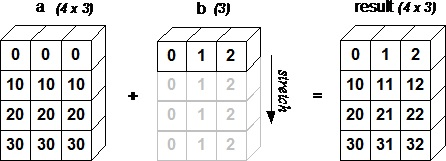

In [103]:
# broadcasting numpy arrays when operating with 2 arrays with different shapes, 
Image('https://www.tutorialspoint.com/numpy/images/array.jpg')

In [104]:
print(rand_array_2)
small_zeros = np.array([0,0,0])
print(small_zeros)

[[ 8  7 15]
 [ 0  9  4]
 [ 0  2 15]]
[0 0 0]


In [105]:
print(rand_array_2 * small_zeros)
# the small_zeros array got broadcasted, as if it's a 3x3 array of 0's.

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [106]:
small_array = np.array([1,2,3])
small_array.resize(3,1)
print(small_array)

[[1]
 [2]
 [3]]


In [107]:
rand_array_2 + small_array
# small_array got broadcasted to a 3x3 array 
# where the first row is 1's, the 2nd row is 2's, and the third row is 3's

array([[ 9,  8, 16],
       [ 2, 11,  6],
       [ 3,  5, 18]])

## Matplotlib
- Matplotlib is a libary used for making graphs and charts
- some useful sites:
  - https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm
  - https://www.geeksforgeeks.org/python-introduction-matplotlib/
  - https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [108]:
from matplotlib import pyplot as plt

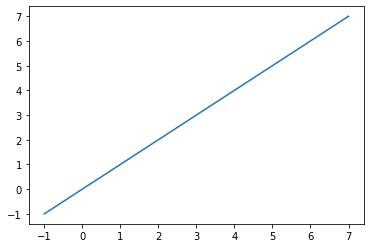

In [109]:
# A simple linear graph
x = [-1,0,1,2,4,5,7]
y = [-1,0,1,2,4,5,7]
plt.plot(x,y) 
plt.show()

In [110]:
sin_x = np.arange(0,50)
sin_y = np.sin(sin_x)
print(sin_x)
print(sin_y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721  0.91294525  0.83665564 -0.00885131 -0.8462204
 -0.90557836 -0.13235175  0.76255845  0.95637593  0.27090579 -0.66363388
 -0.98803162 -0.40403765  0.55142668  0.99991186  0.52908269 -0.42818267
 -0.99177885 -0.64353813  0.29636858  0.96379539  0.74511316 -0.15862267
 -0.91652155 -0.83177474  0.01770193  0.85090352  0.90178835  0.12357312
 -0.76825466 -0.95375265]


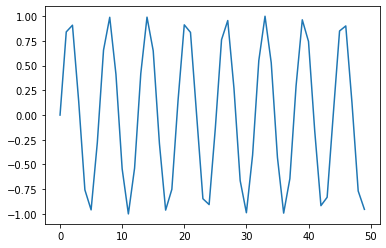

In [111]:
plt.plot(sin_x,sin_y)
plt.show()

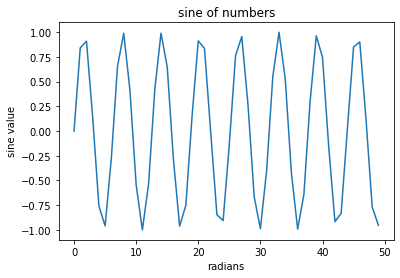

In [112]:
# the graph above is pretty plain - let's describe it a bit!
plt.title("sine of numbers")
plt.xlabel("radians")
plt.ylabel("sine value")
plt.plot(sin_x,sin_y)
plt.show()

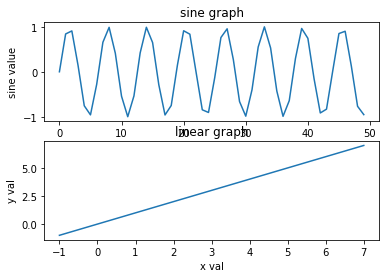

In [114]:
# you can show multiple graphs at once with subplot
plt.subplot(2, 1, 1) # 2 plots, 1 on each row, make the first plot active
plt.xlabel("radians")
plt.ylabel("sine value")
plt.title("sine graph")
plt.plot(sin_x,sin_y)

plt.subplot(2, 1, 2) # 2 plots, 1 on each row, make the first plot active
plt.xlabel("x val")
plt.ylabel("y val")
plt.title("linear graph")
plt.plot(x,y)


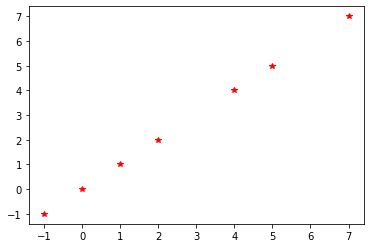

In [115]:
# you can customize the line with different colors and markers! 
plt.plot(x,y, '*r') # the * means to use '*' as points, the 'r' makes the line red
plt.show()

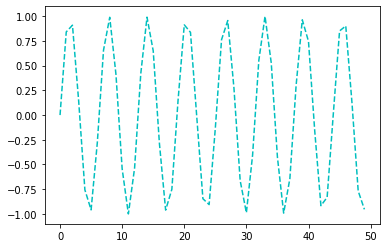

In [116]:
plt.plot(sin_x,sin_y, '--c') # make a dashed cyan line
plt.show()

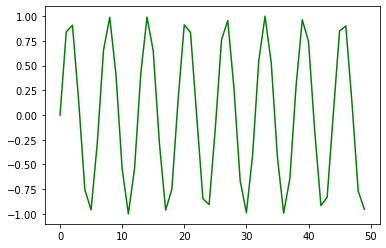

In [117]:
plt.plot(sin_x,sin_y, 'g') # make the line green
plt.show()

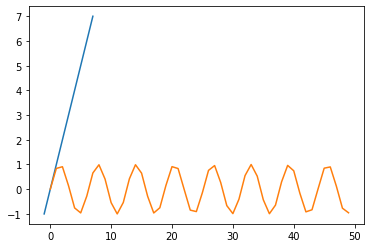

In [118]:
# print more than one graph on the same plot
plt.plot(x,y, sin_x, sin_y)

<BarContainer object of 5 artists>

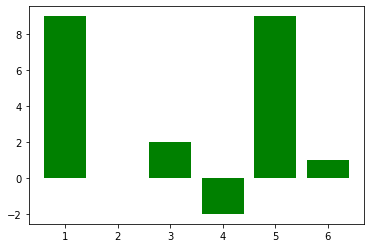

In [119]:
# you can make different types of graphs as well
x = [1,3,4,5,6]
y = [9,2,-2,9,1]
plt.bar(x,y, color='g')

([<matplotlib.patches.Wedge at 0x114e4cb00>,
 [Text(-0.28470088329267024, 1.062518426688391, '31 days'),
  Text(-1.029894329174279e-07, -1.0999999999999954, '30 days'),
  Text(1.062518393368858, -0.2847010076428622, '28 days')])

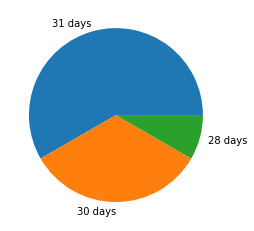

In [120]:
# pie chart

types = ['31 days', '30 days', '28 days']
months = [7, 4, 1]
plt.pie(months, labels=types)

(array([  1.,   0.,   3.,   4.,   2.,   1.,   2.,   2.,   5.,   3.,   7.,
          6.,   7.,  21.,  26.,  18.,  25.,  25.,  25.,  39.,  34.,  45.,
         48.,  42.,  63.,  69.,  85., 102.,  97., 122., 134., 121., 149.,
        167., 168., 196., 203., 203., 214., 242., 259., 270., 258., 277.,
        260., 255., 261., 272., 256., 267., 283., 267., 258., 280., 245.,
        248., 250., 232., 235., 239., 198., 186., 180., 156., 158., 150.,
        119., 104., 103.,  91.,  75.,  79.,  74.,  64.,  56.,  49.,  49.,
         32.,  26.,  26.,  23.,  21.,  15.,  15.,  11.,   9.,   9.,   4.,
          8.,   2.,   2.,   2.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.45609322, -3.38466624, -3.31323927, -3.24181229, -3.17038532,
        -3.09895835, -3.02753137, -2.9561044 , -2.88467742, -2.81325045,
        -2.74182348, -2.6703965 , -2.59896953, -2.52754256, -2.45611558,
        -2.38468861, -2.31326163, -2.24183466, -2.17040769, -2.09898071,
        -2.02755374, -1.95

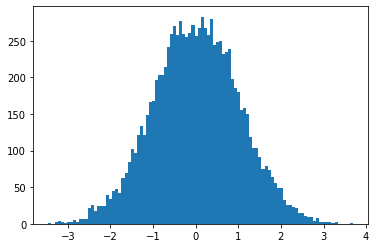

In [121]:
# histogram

rand_ints = np.random.randn(10000) # rand n is purposely going to pick numbers to make a normal distribution
plt.hist(rand_ints, bins=100) 

# Summary
- We can scrape information off the interent using beautiful soup 
    - note that beautiful soup doesn't work with javascript, but there are other packages for that
- We can use Numpy for computing in Python
    - numpy's special feature is arrays
- Matplotlib can take hard-to-process arrays and visualize them for us!